In [21]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(46)
torch.set_default_device(device)

In [22]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True,
)
test_data = datasets.MNIST(root="data", train=False, transform=ToTensor())
X_train_not_normalized = train_data.data.float().to(device=device)
y_train = train_data.targets.to(device=device)
X_test_not_normalized = test_data.data.float().to(device=device)
y_test = test_data.targets.to(device=device)

X_train = (X_train_not_normalized - X_train_not_normalized.min()) / (
    X_train_not_normalized.max() - X_train_not_normalized.min()
)
X_test = (X_test_not_normalized - X_test_not_normalized.min()) / (
    X_test_not_normalized.max() - X_test_not_normalized.min()
)
X_train.view()

In [23]:
class DeepAutoEncoder(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()

        self.layer_1 = nn.Linear(in_features=784, out_features=512)
        self.layer_2 = nn.Linear(in_features=512, out_features=512)
        self.layer_3 = nn.Linear(in_features=512, out_features=128)
        self.layer_4 = nn.Linear(in_features=128, out_features=128)
        self.layer_5 = nn.Linear(in_features=128, out_features=32)
        self.layer_6 = nn.Linear(in_features=32, out_features=32)
        self.layer_7 = nn.Linear(in_features=32, out_features=10)
        self.layer_8 = nn.Linear(in_features=10, out_features=32)
        self.layer_9 = nn.Linear(in_features=32, out_features=32)
        self.layer_10 = nn.Linear(in_features=32, out_features=128)
        self.layer_11 = nn.Linear(in_features=128, out_features=128)
        self.layer_12 = nn.Linear(in_features=128, out_features=512)
        self.layer_13 = nn.Linear(in_features=512, out_features=512)
        self.layer_14 = nn.Linear(in_features=512, out_features=784)
        self.layer_15 = nn.Linear(in_features=784, out_features=784)

    def forward(self, x: torch.Tensor):
        out = self.layer_1(x)
        out = self.tanh(self.relu(out))
        out = self.layer_2(out)
        out = self.layer_3(out)
        out = self.tanh(self.relu(out))
        out = self.layer_4(out)
        out = self.layer_5(out)
        out = self.tanh(out)
        out = self.layer_6(out)
        out = self.layer_7(out)
        out = self.layer_8(out)
        out = self.tanh(out)
        out = self.layer_9(out)
        out = self.layer_10(out)
        out = self.tanh(out)
        out = self.layer_11(out)
        out = self.layer_12(out)
        out = self.tanh(out)
        out = self.layer_13(out)
        out = self.layer_14(out)
        return self.layer_15(out)


model = DeepAutoEncoder()
model

DeepAutoEncoder(
  (relu): ReLU()
  (tanh): Tanh()
  (sigmoid): Sigmoid()
  (layer_1): Linear(in_features=784, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=512, bias=True)
  (layer_3): Linear(in_features=512, out_features=128, bias=True)
  (layer_4): Linear(in_features=128, out_features=128, bias=True)
  (layer_5): Linear(in_features=128, out_features=32, bias=True)
  (layer_6): Linear(in_features=32, out_features=32, bias=True)
  (layer_7): Linear(in_features=32, out_features=10, bias=True)
  (layer_8): Linear(in_features=10, out_features=32, bias=True)
  (layer_9): Linear(in_features=32, out_features=32, bias=True)
  (layer_10): Linear(in_features=32, out_features=128, bias=True)
  (layer_11): Linear(in_features=128, out_features=128, bias=True)
  (layer_12): Linear(in_features=128, out_features=512, bias=True)
  (layer_13): Linear(in_features=512, out_features=512, bias=True)
  (layer_14): Linear(in_features=512, out_features=784, bias=True)
  (laye

In [24]:
EPOCHS = 10
alpha = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)
loss_function = None

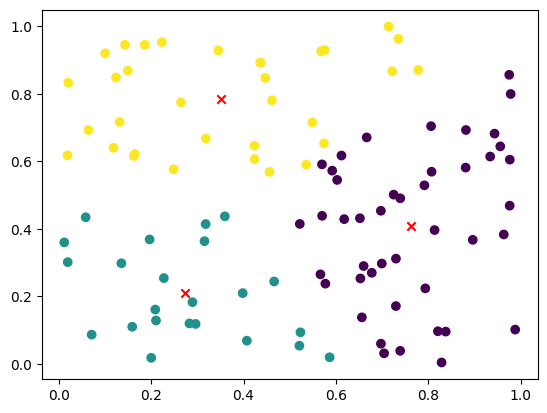

In [25]:
# import torch
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate random 2-D image data
# np.random.seed(0)
# data = np.random.rand(100, 2)
# data_tensor = torch.from_numpy(data).float()

# # Number of clusters
# k = 3

# # Initialize cluster centroids randomly
# centroids = data_tensor[np.random.choice(data_tensor.shape[0], k, replace=False)]

# # Number of iterations
# num_iterations = 100

# # K-Means algorithm
# for i in range(num_iterations):
#     # Calculate distances between data points and centroids
#     distances = torch.cdist(data_tensor, centroids)

#     # Assign each data point to the nearest centroid
#     _, labels = torch.min(distances, dim=1)

#     # Update centroids
#     for j in range(k):
#         cluster_points = data_tensor[labels == j]
#         if len(cluster_points) > 0:
#             centroids[j] = torch.mean(cluster_points, dim=0)

# # Plot the clustered data
# plt.scatter(data[:, 0], data[:, 1], c=labels.numpy())
# plt.scatter(centroids[:, 0], centroids[:, 1], c="r", marker="x")
# plt.show()